### پیاده سازی الگوریتم PSO برای حداکثرسازی تابع

در ابتدا برای سرعت بیشتر از کتابخانه نامپای استفاده میکنم

برای حداکثر سازی این معادله با استفاده از الگوریتم 
PSO
دو کلاس 
Bird 
و 
swarm
را تعریف میکنم


### مراحل الگوریتم PSO


1. جمعیت پرندگان را با موقعیت ها و سرعت های تصادفی اولیه کنید.
2. تناسب هر پرنده را با محاسبه مقدار تابع در موقعیت فعلی آن ارزیابی کنید.
3. در صورت بهبود تناسب اندام، بهترین راه حل شخصی را برای هر پرنده به روز کنید.
4. به روز رسانی بهترین راه حل جهانی برای کل جمعیت بر اساس تناسب اندام همه پرندگان.
5. سرعت و موقعیت هر پرنده را با استفاده از معادلات PSO به روز کنید.
6. مراحل 2-5 را تکرار کنید تا زمانی که یک معیار توقف، مانند حداکثر تعداد تکرارها یا سطح مطلوب تناسب اندام برآورده شود.
7. در هر تکرار، در صورتی که بهترین راه حل جهانی بهبود یابد، بهترین راه حلی که تاکنون پیدا شده است را به روز کنید.
8. چاپ جهانی و بهترین راه حل های یافت شده توسط الگوریتم PSO.





In [2]:
from mpmath import mp
import math
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import random

### تعاریف کلاس

#### کلاس پرندگان (Bird)

کلاس 
Bird
  که پرنده (ذره)در این الگوریتم نشان میدهد  که شامل اتربیوت های زیر است

- position: یک آرایه که موقعیت پرنده را در فضای جستجو نشان می دهد.
- speed(v): یک آرایه ناتوان که نشان دهنده سرعت پرنده است.
- w: پارامتر وزن اینرسی الگوریتم .
- c1: پارامتر شناختی الگوریتم .
- c2: پارامتر اجتماعی الگوریتم .
- globalSolutions : بهترین جواب هایی که توسط کل جمعیت پیدا میشود
- fitness: ارزش هر پرنده
- bestFitness: بهترین فیتنسی که پرنده داشته
- bestPosition: بهترین موقعیت پینده با توجه به فیتنس
- fitnessFunction():تابع فیتنس 
- movementBird(): تابع حرکت





#### fitnessFunction
این تابع فیتنس پرنده را بر اساس مقدار آن در معادله گفته شده بدست میاورد

#### movmentBird
اول اینرسی پرنده را با استفاده از سرعت پرنده در اینرسی پیدا میکند سپس مقدار باقی مانده ان را بر ده بدست میاوریم تا از بی ثباتی عددی جلوگیری کنیم و مقدار اینرسی از حدی بیشتر نشود

سپس بردار های گلوبال بست و پرسونال بست محاسبه میشوند و در عدد رندون بین صفر و یک و مقدار سی ۱ و سی ۲ ضرب میشن

بعد سرعت جدید پرنده از رو این سه متغیر محاسبه میشود (جمعشون) 

حال موقعیت پرنده را بررسی میکنیم تا در محدوده جست و جو جواب باشد اگر اینطور نبود مقدار آن را بین -۱۰ تا ۱۰ برمیگردانیم(برای هر دو بردار آن )

البته قبلش پوزیشن پرنده هم بر اساس سرعت جدید اپدیت میکنیم بعد میبینیم داخل باندی که داریم باشه

بعدم بهترین هاشو اپدیت میکنیم

In [3]:
class Bird:
    def __init__(self,queenNumber,speed , wInersi , c1, c2 ,globalsSolution, boundX=[-10 , 10] , boundY =[-10,10]):
        self.position = np.array(random.sample(list(range(queenNumber)),queenNumber))
        self.wInersi=wInersi
        self.c1=c1
        self.c2=c2
        self.queenNumber=queenNumber
        self.globalsSolution=globalsSolution
        self.speed = np.array(speed)
        self.fitness = self.fitnessFunction()
        self.bestFitness = self.fitness
        self.bestPosition = self.position
        self.boundX = boundX
        self.boundY = boundY
        
    def fitnessFunction(self):
        tempFitness = 0
        for i in range (self.queenNumber):
            for j in range (i+1 , self.queenNumber):
                if (abs(math.floor(self.position[i]) - math.floor(self.position[j])) == abs(i - j)):
                    tempFitness +=1
                if (abs(math.floor(self.position[i]) == math.floor(self.position[j]))):
                    tempFitness +=1
        return tempFitness
    
    def movementBird(self):
        inersi = self.wInersi*(self.speed%10)
        personal_best = self.c1*(np.random.rand()+0.5)*(self.bestPosition-self.position)
        global_best = self.c2*(np.random.rand()+0.5)*(self.globalsSolution[1]-self.position)
        
        v2 = inersi+personal_best+global_best
        self.position = self.position+v2
        self.speed = v2
        
   
        for i in range(len(self.position)):
            self.position[i]%=self.queenNumber

        self.position = np.array(self.position)

        self.fitness = self.fitnessFunction()
        if(self.fitness<self.bestFitness):
            self.bestFitness = self.fitness
            self.bestPosition = self.position
        
        if(self.fitness<=self.globalsSolution[0]):
            self.globalsSolution[0] = self.fitness
            self.globalsSolution[1] = self.position

            
        
        return
    



#### کلاس Swarm

این کلاس مجموعه همه پرنده هارو نشون میده و اتربیوت های مهمشو میگم :

- Birds : میشه همه پرنده هایی که داریم
- bestSolutions : همون بست سلوشنیه که بالا گفتم
- bestAns: بهترین جوابی که پیدا میکنیم 

- itrantions: تعداد ایتریشن هامون

- genItrantions(): تو این تابع با استفاده از نکست ایتریشن میایم ایتریشن جدید رو میسازیم
- prnt(): بهترین جواب رو چاپ میکنیم
- printPlot(): دلات رو ترسیم میکنیم



In [4]:
class swarm:
    Birds=[]
    globalsSolution = [0,[]]
    bestAns = [0,[]]
    x=[]
    y=[]
    def __init__ (self , queenNumber,populationSize , wInersi , c1, c2,itrantions = 20 ) : 
        self.globalsSolution = [queenNumber * queenNumber,[0*queenNumber]]
        self.bestAns = [queenNumber * queenNumber,[0*queenNumber]]
        sampleBird = Bird(queenNumber,[np.random.choice([-1,1])*np.random.rand()*10 for _ in range(queenNumber)], wInersi , c1, c2 , self.globalsSolution)
        self.globalsSolution[0] = sampleBird.bestFitness
        self.globalsSolution[1] = sampleBird.bestPosition
        self.queenNumber=queenNumber
        self.itrantions = itrantions
        self.i = itrantions
        self.x=[]
        self.y=[]
        for _ in range(populationSize):
            v = [np.random.choice([-1,1])*np.random.rand()*10 for _ in range(queenNumber)]
            self.Birds+=[Bird(queenNumber,v ,wInersi , c1, c2 ,self.globalsSolution)]

    def nextItration (self  ): 
        for sampleBird in self.Birds:
            sampleBird.movementBird()    

    def genItrantions (self):
        for i in range(self.itrantions):
            # print("best position : ", self.globalsSolution[0] ,self.globalsSolution[1])

            self.nextItration()
            if (self.globalsSolution[0]< self.bestAns[0]):
                self.bestAns[0] = self.globalsSolution[0]
                self.bestAns[1] = self.globalsSolution[1].copy()
                print(f'new best answer in iteration {i} is : {self.globalsSolution[0]} with coordinates : {list(map(math.floor,self.globalsSolution[1]))} ')
            self.i =i+1
            self.x.append(i)
            self.y.append(self.globalsSolution[0])
            if (self.bestAns[0] == 0 ):
                break
        

    def prnt(self):
        print(f'the best answer in { self.i  } itrations is : {self.bestAns[0]}  {list(map(math.floor,self.bestAns[1]))} ')

    def printPlot(self):
        import matplotlib.pyplot as plt
        plt.plot(self.x, self.y)
        plt.xlabel("ith generation")
        plt.ylabel("min conflicts")

        plt.show()

        

new best answer in iteration 0 is : 5 with coordinates : [5, 5, 6, 3, 0, 4, 4, 7] 
new best answer in iteration 1 is : 4 with coordinates : [4, 0, 0, 3, 5, 5, 2, 6] 
new best answer in iteration 4 is : 3 with coordinates : [3, 0, 4, 5, 1, 1, 7, 2] 
new best answer in iteration 79 is : 2 with coordinates : [1, 6, 2, 7, 7, 0, 3, 6] 
new best answer in iteration 319 is : 1 with coordinates : [5, 1, 6, 0, 7, 1, 4, 2] 
new best answer in iteration 974 is : 0 with coordinates : [3, 7, 0, 4, 6, 1, 5, 2] 
the best answer in 975 itrations is : 0  [3, 7, 0, 4, 6, 1, 5, 2] 


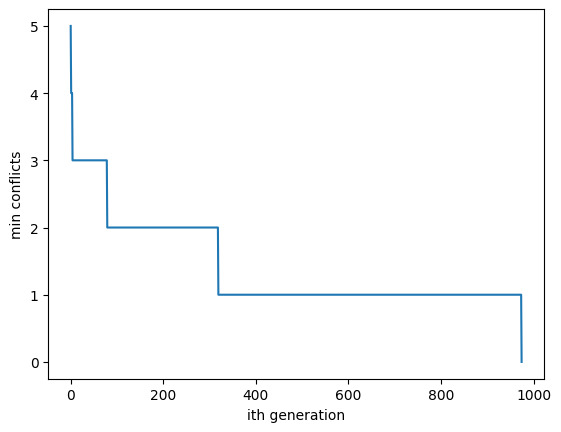

In [5]:
w = 0.05
c1 = 10
c2 = 10
populationSize = 20
mp.dps=20

test = swarm(8,populationSize,w , c1, c2 , itrantions = 10000)
test.genItrantions()
test.prnt()
test.printPlot()

new best answer in iteration 0 is : 12 with coordinates : [4, 19, 1, 18, 17, 6, 0, 8, 11, 10, 7, 9, 2, 13, 14, 16, 15, 12, 5, 3] 
new best answer in iteration 37 is : 11 with coordinates : [9, 2, 0, 3, 1, 10, 12, 17, 12, 1, 17, 5, 14, 16, 9, 4, 13, 18, 11, 0] 
new best answer in iteration 178 is : 10 with coordinates : [17, 1, 5, 16, 6, 19, 5, 2, 1, 7, 18, 3, 8, 14, 4, 15, 19, 12, 12, 6] 
the best answer in 1000 itrations is : 10  [17, 1, 5, 16, 6, 19, 5, 2, 1, 7, 18, 3, 8, 14, 4, 15, 19, 12, 12, 6] 


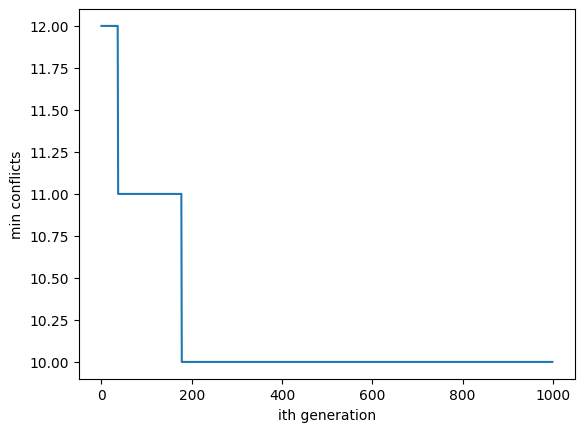

In [27]:
w = 0.05
c1 = 10
c2 = 10
populationSize = 10
mp.dps=20

test2 = swarm(20,populationSize,w , c1, c2 , itrantions = 1000)
test2.genItrantions()
test2.prnt()
test2.printPlot()